In [36]:
import numpy as np
import matplotlib.pyplot as plt

import mne
import yasa

mne.set_log_level('CRITICAL')

plt.style.use('ggplot')
plt.rc('font', size=14)
plt.rc('axes', unicode_minus=False)

> 帮我画个PSD 的图

In [32]:
from scipy.io import loadmat

mat = loadmat(r'D:\WeChat\WeChat Files\wxid_oz3znv9m83ee22\FileStorage\File\2024-04\eeg.mat')
eeg = mat['EEG'][1, :]
sfreq = mat['SampleRate'][0]
times = np.linspace(0, eeg.shape[0] / sfreq, eeg.shape[0])

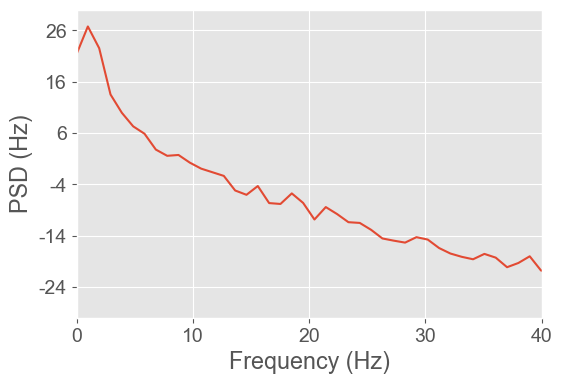

In [33]:
plt.figure(figsize=(6, 4))
plt.psd(eeg, Fs=sfreq, NFFT=512)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (Hz)')
plt.xlim(0, 40)
plt.ylim(-30, 30)
plt.show()

> 另外一个数据帮我画个 这四个波形（麻醉当中的爆发抑制）的图；

In [65]:
mat = loadmat(r'D:\WeChat\WeChat Files\wxid_oz3znv9m83ee22\FileStorage\File\2024-04\eeg(1).mat')
eeg = mat['EEG'][1, :]
sfreq = mat['SampleRate'][0]
times = np.linspace(0, eeg.shape[0] / sfreq, eeg.shape[0])

In [66]:
info = mne.create_info(ch_names=['EEG'], sfreq=sfreq, ch_types='eeg', verbose=False)
raw = mne.io.RawArray(eeg.reshape(1, -1), info, verbose=False)
raw = raw.filter(0.5, 40)
raw = raw.notch_filter([50, 100, 150])

In [67]:
crop_tmin = 1 * 60 * 60 + 3 * 60 + 5
crop_dur = 80
crop_tmax = crop_tmin + crop_dur

raw = raw.crop(crop_tmin, crop_tmax)

NameError: name 'raw' is not defined

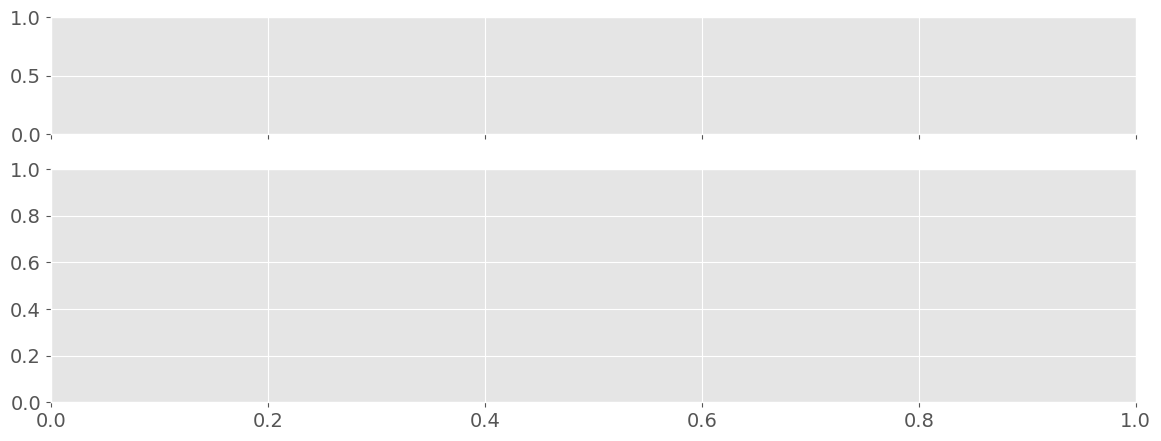

In [4]:
_, ax = plt.subplots(2, 1, figsize=(14, 5), gridspec_kw={"height_ratios": [1, 2], "hspace": 0.2}, sharex='all')

ax[0].plot(
    raw.times,
    raw.get_data().squeeze(),
    linewidth=1,
    zorder=10
)

ax[0].set(
    ylabel='EEG (μV)',
    ylim=(-250, 250)
)


f, t, Sxx = yasa.stft_power(raw.get_data().squeeze(), sfreq, window=2, step=.5, band=(0.5, 40), interp=False)
Sxx = 10 * np.log10(Sxx)

ax[-1].pcolormesh(t, f, Sxx, vmin=-20, vmax=10, cmap='jet', shading='gouraud')

plt.ylabel('Freq. (Hz)')
plt.xlabel('Time (s)')
plt.xlim(0, crop_dur)
plt.gcf().align_labels()
plt.show()